### Notebook created by _Bruna Faria._

###### Experience with ML/DL and exploring data. PhD student in Computational and Data Science and Engineering (Skoltech).


This Notebook is divided into 2 parts:

* Part 1 : basic neural network implementation based on dataset cifar100;
* Part 2 : classifying sub-images using this own model.

> **The main aim here is to demonstrate how to implement a neural network of your own to analyze sub-images.**

# Part 1


* Basic neural network implementation based on cifar100 dataset

* cifar ref: https://www.cs.toronto.edu/~kriz/cifar.html

**SuperClasses and Classes for dataset cifar100:**
<img src="imgs/cifar100.png" width="600" height="300">

### 1) Importing essential libraries and dataset

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


### 2) Display an image as example

In [4]:
#Getting labels for dataset
mapping = {
'aquatic mammals': ['beaver', 'dolphin', 'otter', 'seal', 'whale'],
'fish': ['aquarium_fish', 'flatfish', 'ray', 'shark', 'trout'],
'flowers': ['orchid', 'poppy', 'rose', 'sunflower', 'tulip'],
'food containers': ['bottle', 'bowl', 'can', 'cup', 'plate'],
'fruit and vegetables': ['apple', 'mushroom', 'orange', 'pear', 'sweet_pepper'],
'household electrical device': ['clock', 'computer_keyboard', 'lamp', 'telephone', 'television'],
'household furniture': ['bed', 'chair', 'couch', 'table', 'wardrobe'],
'insects': ['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'],
'large carnivores': ['bear', 'leopard', 'lion', 'tiger', 'wolf'],
'large man-made outdoor things': ['bridge', 'castle', 'house', 'road', 'skyscraper'],
'large natural outdoor scenes': ['cloud', 'forest', 'mountain', 'plain', 'sea'],
'large omnivores and herbivores': ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'],
'medium-sized mammals': ['fox', 'porcupine', 'possum', 'raccoon', 'skunk'],
'non-insect invertebrates': ['crab', 'lobster', 'snail', 'spider', 'worm'],
'people': ['baby', 'boy', 'girl', 'man', 'woman'],
'reptiles': ['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'],
'small mammals': ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'],
'trees': ['maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree'],
'vehicles 1': ['bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train'],
'vehicles 2': ['lawn_mower', 'rocket', 'streetcar', 'tank', 'tractor']
}

def get_classname(ind):
    labels = {0:'apple',1:'aquarium_fish',2:'baby',3:'bear',4:'beaver',5:'bed',
              6:'bee',7:'beetle',8:'bicycle',9:'bottle',10:'bowl',11:'boy',
              12:'bridge',13:'bus',14:'butterfly',15:'camel',16:'can',17:'castle',
              18:'caterpillar',19:'cattle',20:'chair',21:'chimpanzee',22:'clock',23:'cloud',
              24:'cockroach',25:'couch',26:'crab',27:'crocodile',28:'cup',29:'dinosaur',
              30:'dolphin',31:'elephant',32:'flatfish',33:'forest',34:'fox',35:'girl',
              36:'hamster',37:'house',38:'kangaroo',39:'computer_keyboard',40:'lamp',41:'lawn_mower',
              42:'leopard',43:'lion',44:'lizard',45:'lobster',46:'man',47:'maple_tree',
              48:'motorcycle',49:'mountain',50:'mouse',51:'mushroom',52:'oak_tree',53:'orange',
              54:'orchid',55:'otter',56:'palm_tree',57:'pear',58:'pickup_truck',59:'pine_tree',
              60:'plain',61:'plate',62:'poppy',63:'porcupine',64:'possum',65:'rabbit',
              66:'raccoon',67:'ray',68:'road',69:'rocket',70:'rose',71:'sea',
              72:'seal',73:'shark',74:'shrew',75:'skunk',76:'skyscraper',77:'snail',
              78:'snake',79:'spider',80:'squirrel',81:'streetcar',82:'sunflower',83:'sweet_pepper',
              84:'table',85:'tank',86:'telephone',87:'television',88:'tiger',89:'tractor',
              90:'train',91:'trout',92:'tulip',93:'turtle',94:'wardrobe',95:'whale',
              96:'willow_tree',97:'wolf',98:'woman',99:'worm'
    }
    
    label = labels[ind]
    
    for key, value in mapping.items():
        if label in value:
            superclass = key
    
    return print(superclass,':', label)

household electrical device : telephone
None


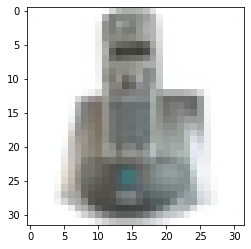

In [5]:
#Displaying image and its label: superclasse and classe
i = np.random.randint(low=0, high=3000)
plt.imshow(x_test[i])
print(get_classname(int(y_test[i])))

large omnivores and herbivores : camel
None


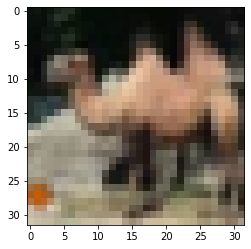

In [6]:
i = np.random.randint(low=0, high=3000)
plt.imshow(x_test[i])
print(get_classname(int(y_test[i])))

### 3) Creating a model

* Model based on reference: https://github.com/chetnakhanna16/CIFAR100_ImageRecognition/blob/master/EffiicientNetB0_CIFAR100.ipynb

In [7]:
efnb0 = tf.keras.applications.efficientnet.EfficientNetB0(weights='imagenet', 
                                                          include_top=False, 
                                                          input_shape=(32,32,3), classes=100)

model = tf.keras.Sequential()
model.add(efnb0)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(100, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 1, 1, 1280)        4049571   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               128100    
Total params: 4,177,671
Trainable params: 4,135,648
Non-trainable params: 42,023
_________________________________________________________________


In [8]:
#Optimizer 
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

#Early stopping to monitor the validation loss and avoid overfitting
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

#Reducing learning rate on plateau
rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', patience= 5, factor= 0.5, min_lr= 1e-6, verbose=1)

In [9]:
#The one own callback can be implemented instead.
class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None): 
        val_acc = logs["val_accuracy"]
        if val_acc >= self.threshold:
            self.model.stop_training = True

In [10]:
my_callback = MyThresholdCallback(threshold=0.9)

In [11]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

### 4) Starting model training

In [12]:
#Applying OneHotEncoding to y
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [13]:
#Normalizing X
x_train = x_train/255.0
x_test = x_test/255.0

**This next step was done using Colab!**

In [ ]:
#Fitting model 
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=100,
                    #validation_split=0.25,
                    validation_data=(x_test, y_test),
                    verbose=1,
                    callbacks=[early_stop, rlrop]# my_callback]
                    )

In [ ]:
#Visualizing the loss and accuracy against number of epochs
plt.figure(figsize=(18,8))
plt.suptitle('Loss and Accuracy Plots', fontsize=18)
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Number of epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Number of epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.show()

In [ ]:
#Evaluating model
test_loss, test_accuracy = model.evaluate(x_test, y_test)

In [ ]:
print("Test accuracy: {}".format(test_accuracy))

In [ ]:
#Saving model and weights
model_json = model.to_json()
with open("cifar100_final.json", "w") as json_file:
    json_file.write(model_json)
    
model.save_weights("cifar100_final.h5")

# Part 2

* Classifying sub-images (objects) with pre-trained model based on cifar100

### 5) Loading model saved before

In [14]:
# load json and create model
json_file = open('cifar100_example.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = tf.keras.models.model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("cifar100_example.h5")
print("Loaded model from disk")

Loaded model from disk


In [15]:
loaded_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 53.28%


### 6) Implementing a function to load input images

In [22]:
#For images from files in subs folder as jpg
def get_input_jpg(image):
    img_ = tf.keras.preprocessing.image.load_img(image, target_size=(32, 32))
    img_array = tf.keras.preprocessing.image.img_to_array(img_)
    img_array = img_array.reshape((32, 32, 3))
    img_input = tf.keras.applications.efficientnet.preprocess_input(img_array)
    return img_, img_input

### 9) Example of classification

fruit and vegetables : mushroom
None


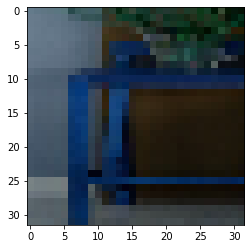

non-insect invertebrates : spider
None


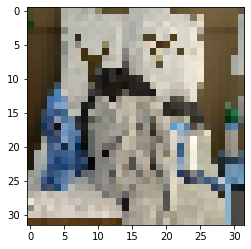

large natural outdoor scenes : forest
None


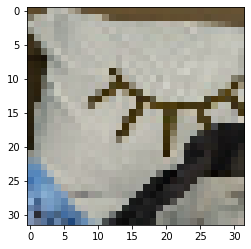

household furniture : table
None


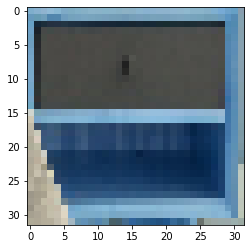

trees : maple_tree
None


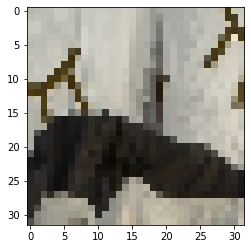

trees : maple_tree
None


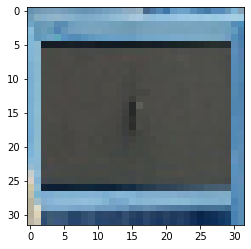

large natural outdoor scenes : forest
None


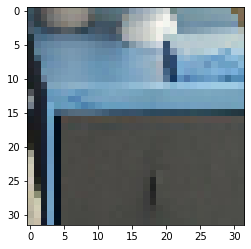

fruit and vegetables : sweet_pepper
None


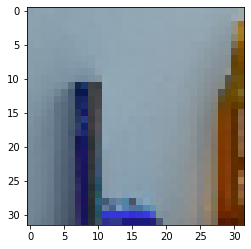

household furniture : table
None


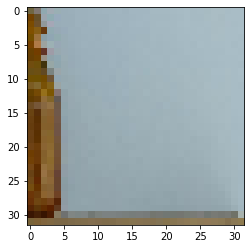

household furniture : table
None


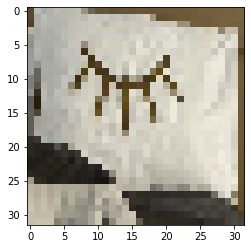

In [23]:
#Choosing some random sub-images to classify

random_imgs = np.random.choice(os.listdir('selsearch'), 10) #10 images as example
for i in random_imgs:
    img, img_input = get_input_jpg('selsearch/'+i)
    yhat = loaded_model.predict(np.array([img_input]))
    print(get_classname(np.argmax(yhat)))
    plt.imshow(img)
    plt.show()

> **Clearly, the model trained needs to be improved as well as the input images.**